## Quiz #0801

### "Text Classification with Keras"

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
#nltk.download('stopwords')

#### Answer the following question by providing Python code:

1). Read in the movie review data from Cornell CS department. Carry out the EDA. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip (!tar -x -f review_polarity.tar.gz). <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [2]:
#Descomprimimos la carpeta descargada
!tar -x -f review_polarity.tar.gz

In [3]:
# Guardamos la info en una variable 
data = load_files('./txt_sentoken/',encoding='latin1')

In [4]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
#Visualizamos las 5 primeras reseñas
data['data'][:5]

["arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [6]:
#Asignamos los datos a las variables X e Y
X = data['data']
Y = data['target']

2). Carry out the data preprocessing: <br>
- Cleaning.
- Stopword removal.

In [7]:
# Comprobamos las cuántas clases tiene la variable Y (0 y 1), así como la cantidad de datos pertenecientes a casa una.
np.unique(Y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

In [8]:
len(X)

2000

In [9]:
#Ambas posibles clasificaciones tienen el mismo número de datos/reviews. Están equilibradas (no necesitan que las igualemos).

In [10]:
numClasses = len(np.unique(Y))
print(numClasses)

2


In [11]:
#Codificar cada palabra con un índice (es necesario para nuestra capa Embedding)
#Preprocesamos las documentos(mensajes) (https://docs.python.org/3/howto/regex.html)
corpus=[]
for i in range(len(X)):
  review = X[i] #Seleccionamos el m ensaje
  review = re.sub(r'\W', ' ', str(X[i]))  #Reemplaza todo lo que no sea un caracter alfanumérico por un espacio
  review = review.lower()
  review = re.sub(r'^br$', ' ', review)         #Reemplaza los saltos de línea/br (sin espacios)
  review = re.sub(r'\s+br\s+',' ',review)       #Reemplaza los saltos de línea/br con espacios antes y después del mismo
  review = re.sub(r'\s+[a-z]\s+', ' ',review)   #Reemplaza el patrón 'espacio-letra-espacio' en una cadena de texto
  review = re.sub(r'^b\s+', '', review)         #Reemplaza las 'b' seguida de espacio al principio de una cadena de texto
  review = re.sub(r'\s+', ' ', review)          #Elimina los espacios que introdujimos en los anteriores pasos, mediante la sustitución.
  corpus.append(review)

In [12]:
#Comparamos la londitud de la X antes y después del prepocesado de datos
print(len(corpus), len(X))

2000 2000


In [13]:
#Visualizamos cómo ha quedado el corpus
n = 10
for i in range(n):
  print(corpus[i])

arnold schwarzenegger has been an icon for action enthusiasts since the late 80 but lately his films have been very sloppy and the one liners are getting worse it hard seeing arnold as mr freeze in batman and robin especially when he says tons of ice jokes but hey he got 15 million what it matter to him once again arnold has signed to do another expensive blockbuster that can compare with the likes of the terminator series true lies and even eraser in this so called dark thriller the devil gabriel byrne has come upon earth to impregnate woman robin tunney which happens every 1000 years and basically destroy the world but apparently god has chosen one man and that one man is jericho cane arnold himself with the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world parts of this are actually so absurd that they would fit right in with dogma yes the film is that weak but it better than the other blockbuster right now sleepy hollow but it make

In [14]:
#Descargamos estas utilidades para el siguiente paso
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#2. Crear un corpus de palabras (tokenizar los documentos)
corpusWords=[]
for review in corpus:
  words = nltk.word_tokenize(review)
  words = [x for x in words if x not in nltk.corpus.stopwords.words('english')]
  words = [x for x in words if len(x) > 2]
  corpusWords.append(words)

In [16]:
# Visualizamos el corpus de palabras
n = 10
for i in range(n):
  print(corpusWords[i])

['arnold', 'schwarzenegger', 'icon', 'action', 'enthusiasts', 'since', 'late', 'lately', 'films', 'sloppy', 'one', 'liners', 'getting', 'worse', 'hard', 'seeing', 'arnold', 'freeze', 'batman', 'robin', 'especially', 'says', 'tons', 'ice', 'jokes', 'hey', 'got', 'million', 'matter', 'arnold', 'signed', 'another', 'expensive', 'blockbuster', 'compare', 'likes', 'terminator', 'series', 'true', 'lies', 'even', 'eraser', 'called', 'dark', 'thriller', 'devil', 'gabriel', 'byrne', 'come', 'upon', 'earth', 'impregnate', 'woman', 'robin', 'tunney', 'happens', 'every', '1000', 'years', 'basically', 'destroy', 'world', 'apparently', 'god', 'chosen', 'one', 'man', 'one', 'man', 'jericho', 'cane', 'arnold', 'help', 'trusty', 'sidekick', 'kevin', 'pollack', 'stop', 'nothing', 'let', 'devil', 'take', 'world', 'parts', 'actually', 'absurd', 'would', 'fit', 'right', 'dogma', 'yes', 'film', 'weak', 'better', 'blockbuster', 'right', 'sleepy', 'hollow', 'makes', 'world', 'enough', 'look', 'like', 'star', 

3). Carry out label encoding by integers (required form by Keras):

In [17]:
#Guardamos el número de palabras en una variable que usaremos más adelante.
numWords = len(corpusWords)

In [18]:
#3.Crear un índice (diccionario) con las palabras más frecuentes
vocabulary = []  #creamos un conjunto de palabras, de vocabulario, con todos los términos de las reseñas

for doc in corpusWords:
  vocabulary += doc
#Ordenamos las palabras en función de su número de repeticiones en el conjunto de reseñas
sortedWords = pd.Series(vocabulary).value_counts().index 
dicc = {}
for i in range(numWords):
  dicc[sortedWords[i]] =i+1

print(len(vocabulary))
print(dicc)
print(len(dicc))

696832
{'film': 1, 'one': 2, 'movie': 3, 'like': 4, 'even': 5, 'good': 6, 'time': 7, 'story': 8, 'would': 9, 'much': 10, 'character': 11, 'also': 12, 'get': 13, 'two': 14, 'well': 15, 'characters': 16, 'first': 17, 'see': 18, 'way': 19, 'make': 20, 'life': 21, 'really': 22, 'films': 23, 'plot': 24, 'little': 25, 'people': 26, 'could': 27, 'scene': 28, 'man': 29, 'bad': 30, 'never': 31, 'best': 32, 'new': 33, 'scenes': 34, 'many': 35, 'director': 36, 'know': 37, 'movies': 38, 'action': 39, 'great': 40, 'another': 41, 'love': 42, 'made': 43, 'big': 44, 'end': 45, 'something': 46, 'back': 47, 'still': 48, 'world': 49, 'seems': 50, 'work': 51, 'makes': 52, 'however': 53, 'every': 54, 'though': 55, 'better': 56, 'real': 57, 'audience': 58, 'seen': 59, 'enough': 60, 'take': 61, 'around': 62, 'going': 63, 'year': 64, 'performance': 65, 'role': 66, 'old': 67, 'gets': 68, 'may': 69, 'things': 70, 'think': 71, 'years': 72, 'last': 73, 'comedy': 74, 'funny': 75, 'actually': 76, 'long': 77, 'look'

In [19]:
#4. Codificamos finalmente cada palabra presente en las reseñas del corpus.
codedCorpus = []
for review in corpusWords:
  codedDoc = [dicc[word] for word in review if word in dicc]
  codedCorpus.append(codedDoc)

4). Prepare the data for AI: <br>
- Apply the padding.
- Split the data into training and testing.

Media:225.325


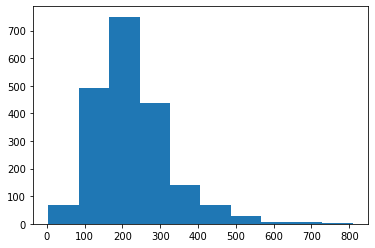

In [20]:
# Consultamos cual es la media de longitud de las reseñas (con los datos procesados)
extension = [len(d) for d in codedCorpus]
print('Media:{}'.format(np.mean(extension)))
plt.hist(extension)
plt.show()

In [21]:
#Creamos los conjuntos de entrenamiento y test
#Como la mayoría de reseñas tienen una longitus de 100-300 palabras, establecemos un parámetro en torno a ese núm.
parameter = 300

X_final = sequence.pad_sequences(codedCorpus, maxlen= parameter)
Y_final = np.array(Y)

In [22]:
#Dividimos los datos en conjuntos de entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=123)

In [23]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1400, 300) (1400,)
(600, 300) (600,)


5). Define the AI model (Embedding + LSTM):

In [24]:
#Dimension del espacio denso 
numNeurons = 50
dimDense = 100
#[NumSecuencias(documentos), NumSecuencia(NumPalabrasDocumento = 300)]
modelo = Sequential()
modelo.add(Embedding(input_dim= numWords+1, output_dim=dimDense)) #Incrustación de palabras
modelo.add(LSTM(units=numNeurons, return_sequences=False, activation='tanh'))
modelo.add(Dense(units=1, activation= 'sigmoid' ))

In [25]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         200100    
                                                                 
 lstm (LSTM)                 (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 230,351
Trainable params: 230,351
Non-trainable params: 0
_________________________________________________________________


6). Define the optimizer and compile the model:

In [26]:
tasaApr= 0.0001
modelo.compile(optimizer= Adam(learning_rate = tasaApr), loss= 'binary_crossentropy', metrics= ['accuracy'])

7). Train the model and visualize the summary:

In [27]:
epocas = 8 #Si vemos que la gráfica hace muchos picos, podemos aumentar el número de épocas bajando la tasa se aprendizaje, para que no aprenda a golpes
tamBatch = 10 #no un tamaño muy grande para que se vaya actualizando cada poco y adaptándose
resEntrena= modelo.fit(X_train, Y_train, epochs= epocas, batch_size= tamBatch, validation_split=0.2, verbose=1)

Epoch 1/8
112/112 [==============================] - 12s 79ms/step - loss: 0.6935 - accuracy: 0.5045 - val_loss: 0.6925 - val_accuracy: 0.5536
Epoch 2/8
112/112 [==============================] - 8s 74ms/step - loss: 0.6894 - accuracy: 0.6161 - val_loss: 0.6909 - val_accuracy: 0.5607
Epoch 3/8
112/112 [==============================] - 8s 74ms/step - loss: 0.6763 - accuracy: 0.6616 - val_loss: 0.6767 - val_accuracy: 0.6929
Epoch 4/8
112/112 [==============================] - 8s 73ms/step - loss: 0.6199 - accuracy: 0.8214 - val_loss: 0.6259 - val_accuracy: 0.6750
Epoch 5/8
112/112 [==============================] - 8s 75ms/step - loss: 0.4725 - accuracy: 0.8330 - val_loss: 0.5510 - val_accuracy: 0.7464
Epoch 6/8
112/112 [==============================] - 8s 73ms/step - loss: 0.3448 - accuracy: 0.8884 - val_loss: 0.5112 - val_accuracy: 0.7429
Epoch 7/8
112/112 [==============================] - 8s 75ms/step - loss: 0.2495 - accuracy: 0.9304 - val_loss: 0.4564 - val_accuracy: 0.7857
Epoch

In [28]:
resEntrena.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

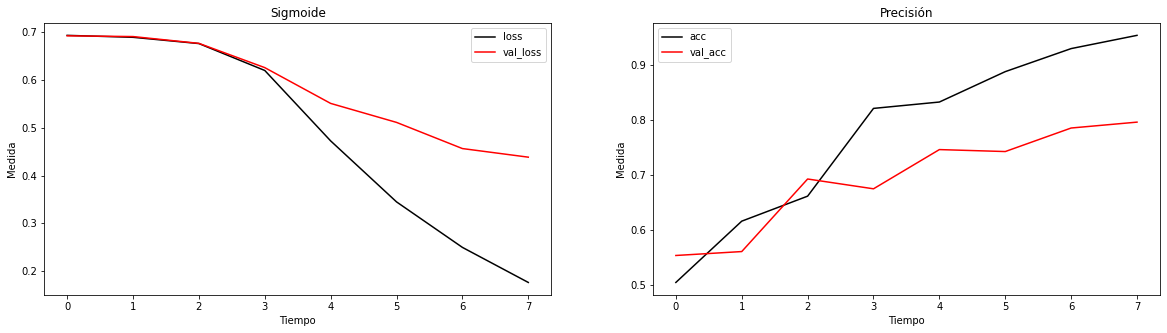

In [29]:
fig, ejes = plt.subplots(nrows =1, ncols=2, figsize=[20,5])
ejes[0].plot(resEntrena.history['loss'], color= 'black', linestyle= '-', label='loss')
ejes[0].plot(resEntrena.history['val_loss'], color= 'red', label='val_loss')
ejes[0].set_title('Sigmoide')
ejes[0].set_xlabel('Tiempo')
ejes[0].set_ylabel('Medida')
ejes[0]. legend(loc='upper right')
ejes[1].plot(resEntrena.history['accuracy'],color='black', linestyle= '-', label= 'acc')
ejes[1].plot(resEntrena.history['val_accuracy'],color='red', label= 'val_acc')
ejes[1].set_title('Precisión')
ejes[1].set_xlabel('Tiempo')
ejes[1].set_ylabel('Medida')
ejes[1]. legend(loc='best')
plt.show()

8). Display the test result (accuracy):

In [30]:
resTest = modelo.evaluate(X_test, Y_test, verbose=0)
print('Precisión sobre el conjunto de test:{} '.format(np.round(resTest[1],2)))

Precisión sobre el conjunto de test:0.84 
